In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

features: tensor([-1.4030, -1.2245]) 
labels: tensor([5.5514])


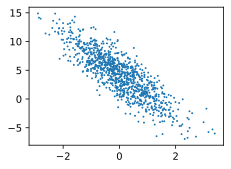

In [3]:
print('features:', features[0], '\nlabels:', labels[0])
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [4]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break
    

tensor([[ 0.7287,  0.3697],
        [ 1.4845, -1.0021],
        [-1.7002, -0.1719],
        [-0.9276,  1.5215],
        [ 0.0530,  1.1000],
        [-0.5828, -1.4336],
        [-0.1066, -0.7205],
        [ 0.7671, -0.2110],
        [-0.2817, -0.3593],
        [-0.1876, -1.0606]]) 
 tensor([[ 4.4108],
        [10.5633],
        [ 1.3763],
        [-2.8348],
        [ 0.5866],
        [ 7.9249],
        [ 6.4418],
        [ 6.4539],
        [ 4.8665],
        [ 7.4350]])


In [5]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [6]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [7]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [8]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [9]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f"epoch {epoch + 1}, loss {float(train_l.mean()):f}")

epoch 1, loss 0.036303
epoch 2, loss 0.000130
epoch 3, loss 0.000046


In [10]:
print(f'w的估计误差： {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差： {true_b - b}')

w的估计误差： tensor([-1.0514e-04, -9.7752e-06], grad_fn=<SubBackward0>)
b的估计误差： tensor([0.0004], grad_fn=<RsubBackward1>)
